In [45]:
import sys
from transformers import PatchTSTForPretraining

sys.path.append('../PatchTST_self_supervised')
from src.data.pred_dataset import TUH_Dataset_Test

context_length = 2500
patch_length = 250

tuh_eval_data = TUH_Dataset_Test(
    root_path='/mnt/ssd_4tb_0/data/tuh_preprocessed_npy_test',#'/mnt/ssd_4tb_0/data/tuh_preprocessed_npy',
    data_path='',
    csv_path='../preprocessing/inputs/sub_list2.csv',
    features='M',
    scale=False,
    size=[context_length, 0, patch_length],
    use_time_features=False,
    split='val'
)

        

Found 10 patients with 10 files
Loaded existing patient splits from /mnt/ssd_4tb_0/data/tuh_preprocessed_npy_test/tuh_patient_splits.pkl
Split: val, Patients: 1, Files: 1
Total Sequences: 386251


In [46]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

batch_size = 256
dataloader = DataLoader(tuh_eval_data, batch_size=batch_size, shuffle=False)
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
# model.to(device)

mask_ratio = 0.4
patch_length = 250
patch_stride = 250

# num patches 
num_patches = context_length//patch_length


def evaluate_model(model, dataloader, mask_ratio):
    model.to(device)
    model.eval()
    total_loss = 0
    num_batches = 0
    loss_fn = torch.nn.MSELoss()

    for batch in tqdm(dataloader):
        seq_x = batch['past_values'].to(device)  

        with torch.no_grad():
            outputs = model(seq_x)

        total_loss += outputs['loss']
        num_batches += 1

    avg_loss = total_loss / num_batches
    # print(f"Validation Loss: {avg_loss:.4f}")
    return avg_loss


In [47]:
import json
import numpy as np
path_ = '/home/gayal/ssl-project/PatchTST/PatchTST_self_supervised/saved_models/test_run_10_recordings/outputs/checkpoint-50/trainer_state.json'

def get_train_loss(path_):
    train_losses = []
    with open(path_, 'r') as file:
        data = json.load(file)
        data_history = data['log_history']
        for item in data_history:
            if 'loss' in item:
                train_losses.append(item['loss'])
                # print(item['step'], item['loss'])

    # average the train losses
    train_losses = np.array(train_losses)
    avg_train_loss = np.mean(train_losses)

    return avg_train_loss
    
train_loss = get_train_loss(path_)
print(f"Average Train Loss: {train_loss}")

Average Train Loss: 0.9725480000000001


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:01<00:00, 12.47it/s]


val loss for 50: 0.9648053646087646
train loss for 50: 0.9725480000000001


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:03<00:00, 12.19it/s]


val loss for 100: 0.9589797258377075
train loss for 100: 0.9642529999999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:03<00:00, 12.21it/s]


val loss for 150: 0.9444891214370728
train loss for 150: 0.9558639999999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.01it/s]


val loss for 200: 0.9367853403091431
train loss for 200: 0.9475159999999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:04<00:00, 12.11it/s]


val loss for 250: 0.9330003261566162
train loss for 250: 0.9408023999999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.02it/s]


val loss for 300: 0.9286779165267944
train loss for 300: 0.9356136666666667


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:04<00:00, 12.09it/s]


val loss for 350: 0.9205776453018188
train loss for 350: 0.9302571428571428


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.02it/s]


val loss for 400: 0.9120143055915833
train loss for 400: 0.9242170000000001


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.81it/s]


val loss for 450: 0.9090307950973511
train loss for 450: 0.9186877777777778


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:04<00:00, 12.13it/s]


val loss for 500: 0.9079263210296631
train loss for 500: 0.9136618


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:02<00:00, 12.31it/s]


val loss for 550: 0.9068704843521118
train loss for 550: 0.9091965454545455


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:04<00:00, 12.16it/s]


val loss for 600: 0.9051655530929565
train loss for 600: 0.9052633333333333


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.89it/s]


val loss for 650: 0.9047986268997192
train loss for 650: 0.9017695384615384


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.90it/s]


val loss for 700: 0.9039842486381531
train loss for 700: 0.8988635714285715


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.88it/s]


val loss for 750: 0.903205394744873
train loss for 750: 0.8961725333333334


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.82it/s]


val loss for 800: 0.9028676748275757
train loss for 800: 0.89382625


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.82it/s]


val loss for 850: 0.9029468894004822
train loss for 850: 0.8917335294117648


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.91it/s]


val loss for 900: 0.9030705690383911
train loss for 900: 0.889673111111111


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.85it/s]


val loss for 950: 0.9028287529945374
train loss for 950: 0.8878443157894736


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.96it/s]


val loss for 1000: 0.9027019143104553
train loss for 1000: 0.8862827


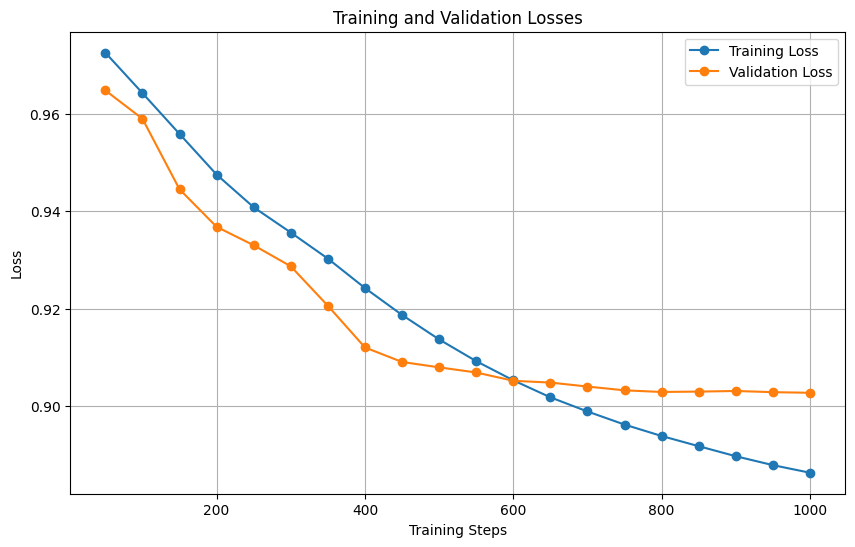

In [48]:
checkpoint_path_dir = '/home/gayal/ssl-project/PatchTST/PatchTST_self_supervised/saved_models/test_run_10_recordings/outputs/'#'checkpoint-50'

import os
import json
import numpy as np
import matplotlib.pyplot as plt

checkpoint_steps = 50
train_steps = 1000

train_losses = []
val_losses = []

for check_step in range(checkpoint_steps, train_steps+checkpoint_steps, checkpoint_steps):
    check_path = f"checkpoint-{check_step}"
    check_dir = os.path.join(checkpoint_path_dir, check_path)


    model = PatchTSTForPretraining.from_pretrained(check_dir)
    avg_loss = evaluate_model(model, dataloader, mask_ratio)
    print(f"val loss for {check_step}: {avg_loss}")
    val_losses.append(avg_loss.cpu().numpy())

    train_loss_path = os.path.join(check_dir, "trainer_state.json")
    train_loss = get_train_loss(train_loss_path)
    print(f"train loss for {check_step}: {train_loss}")
    train_losses.append(train_loss)


import matplotlib.pyplot as plt
import numpy as np

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(np.arange(checkpoint_steps, train_steps+checkpoint_steps, checkpoint_steps), train_losses, label='Training Loss', marker='o')
plt.plot(np.arange(checkpoint_steps, train_steps+checkpoint_steps, checkpoint_steps), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid()
plt.savefig('loss_plot.png')
plt.show()


In [49]:
print(train_losses, val_losses)

[0.9725480000000001, 0.9642529999999999, 0.9558639999999999, 0.9475159999999999, 0.9408023999999999, 0.9356136666666667, 0.9302571428571428, 0.9242170000000001, 0.9186877777777778, 0.9136618, 0.9091965454545455, 0.9052633333333333, 0.9017695384615384, 0.8988635714285715, 0.8961725333333334, 0.89382625, 0.8917335294117648, 0.889673111111111, 0.8878443157894736, 0.8862827] [array(0.96480536, dtype=float32), array(0.9589797, dtype=float32), array(0.9444891, dtype=float32), array(0.93678534, dtype=float32), array(0.9330003, dtype=float32), array(0.9286779, dtype=float32), array(0.92057765, dtype=float32), array(0.9120143, dtype=float32), array(0.9090308, dtype=float32), array(0.9079263, dtype=float32), array(0.9068705, dtype=float32), array(0.90516555, dtype=float32), array(0.9047986, dtype=float32), array(0.90398425, dtype=float32), array(0.9032054, dtype=float32), array(0.9028677, dtype=float32), array(0.9029469, dtype=float32), array(0.90307057, dtype=float32), array(0.90282875, dtype=f

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.90it/s]


val loss for 500: 0.9202723503112793
train loss for 500: 0.9236007999999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:08<00:00, 11.76it/s]


val loss for 1000: 0.8984572887420654
train loss for 1000: 0.8925623


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:08<00:00, 11.76it/s]


val loss for 1500: 0.8900235295295715
train loss for 1500: 0.8730424


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:00<00:00, 12.54it/s]


val loss for 2000: 0.8855701684951782
train loss for 2000: 0.85983805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:01<00:00, 12.41it/s]


val loss for 2500: 0.8827506303787231
train loss for 2500: 0.8493079600000001


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.05it/s]


val loss for 3000: 0.8806261420249939
train loss for 3000: 0.8404429999999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:04<00:00, 12.13it/s]


val loss for 3500: 0.8792705535888672
train loss for 3500: 0.8327544571428571


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:08<00:00, 11.77it/s]


val loss for 4000: 0.8783349394798279
train loss for 4000: 0.826145725


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:03<00:00, 12.21it/s]


val loss for 4500: 0.8764780163764954
train loss for 4500: 0.8202885555555556


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.06it/s]


val loss for 5000: 0.8749963045120239
train loss for 5000: 0.8152516599999999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [01:59<00:00, 12.64it/s]


val loss for 5500: 0.8742796182632446
train loss for 5500: 0.8107981090909092


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.82it/s]


val loss for 6000: 0.8737814426422119
train loss for 6000: 0.8068208833333333


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:08<00:00, 11.78it/s]


val loss for 6500: 0.8730295896530151
train loss for 6500: 0.8031917384615385


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:04<00:00, 12.11it/s]


val loss for 7000: 0.8724343180656433
train loss for 7000: 0.7999894428571429


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.02it/s]


val loss for 7500: 0.8721868395805359
train loss for 7500: 0.7971606933333334


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:05<00:00, 12.02it/s]


val loss for 8000: 0.8718835115432739
train loss for 8000: 0.7945812000000001


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:03<00:00, 12.17it/s]


val loss for 8500: 0.8716827034950256
train loss for 8500: 0.7923771176470589


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.88it/s]


val loss for 9000: 0.8717732429504395
train loss for 9000: 0.7904166


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:07<00:00, 11.80it/s]


val loss for 9500: 0.8716552257537842
train loss for 9500: 0.7886083789473685


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1509/1509 [02:06<00:00, 11.97it/s]


val loss for 10000: 0.8717478513717651
train loss for 10000: 0.7869834


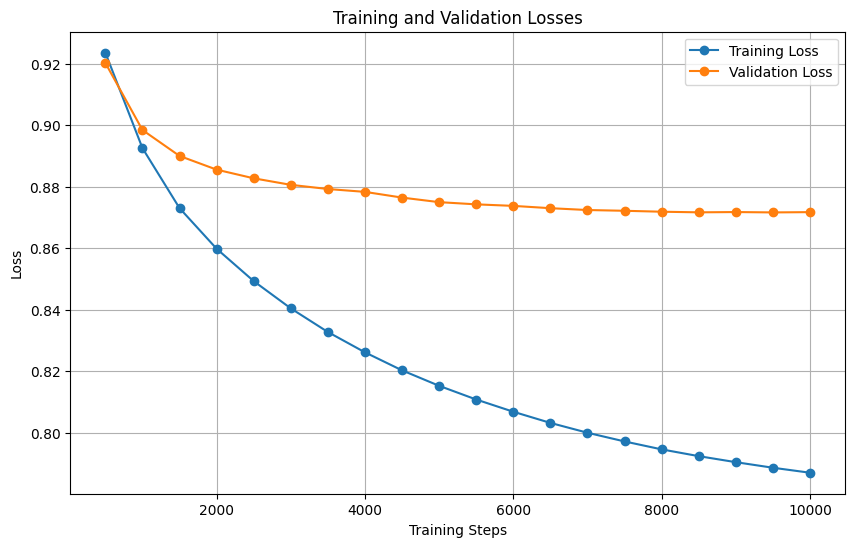

[0.9236007999999999, 0.8925623, 0.8730424, 0.85983805, 0.8493079600000001, 0.8404429999999999, 0.8327544571428571, 0.826145725, 0.8202885555555556, 0.8152516599999999, 0.8107981090909092, 0.8068208833333333, 0.8031917384615385, 0.7999894428571429, 0.7971606933333334, 0.7945812000000001, 0.7923771176470589, 0.7904166, 0.7886083789473685, 0.7869834] [array(0.92027235, dtype=float32), array(0.8984573, dtype=float32), array(0.8900235, dtype=float32), array(0.88557017, dtype=float32), array(0.88275063, dtype=float32), array(0.88062614, dtype=float32), array(0.87927055, dtype=float32), array(0.87833494, dtype=float32), array(0.876478, dtype=float32), array(0.8749963, dtype=float32), array(0.8742796, dtype=float32), array(0.87378144, dtype=float32), array(0.8730296, dtype=float32), array(0.8724343, dtype=float32), array(0.87218684, dtype=float32), array(0.8718835, dtype=float32), array(0.8716827, dtype=float32), array(0.87177324, dtype=float32), array(0.8716552, dtype=float32), array(0.871747

In [50]:
checkpoint_path_dir = '/home/gayal/ssl-project/PatchTST/PatchTST_self_supervised/saved_models/test_run_10_recordings_10k/outputs/'#'checkpoint-50'

import os
import json
import numpy as np
import matplotlib.pyplot as plt

checkpoint_steps = 500
train_steps = 10000

train_losses = []
val_losses = []

for check_step in range(checkpoint_steps, train_steps+checkpoint_steps, checkpoint_steps):
    check_path = f"checkpoint-{check_step}"
    check_dir = os.path.join(checkpoint_path_dir, check_path)


    model = PatchTSTForPretraining.from_pretrained(check_dir)
    avg_loss = evaluate_model(model, dataloader, mask_ratio)
    print(f"val loss for {check_step}: {avg_loss}")
    val_losses.append(avg_loss.cpu().numpy())

    train_loss_path = os.path.join(check_dir, "trainer_state.json")
    train_loss = get_train_loss(train_loss_path)
    print(f"train loss for {check_step}: {train_loss}")
    train_losses.append(train_loss)


import matplotlib.pyplot as plt
import numpy as np

# Plotting the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(np.arange(checkpoint_steps, train_steps+checkpoint_steps, checkpoint_steps), train_losses, label='Training Loss', marker='o')
plt.plot(np.arange(checkpoint_steps, train_steps+checkpoint_steps, checkpoint_steps), val_losses, label='Validation Loss', marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.grid()
plt.savefig('loss_plot.png')
plt.show()

print(train_losses, val_losses)